# IBM Data Science Professional Certificate

## Capstone Project

#### This is the Applied Data Science Capstone Project notebook created by <a href="https://www.linkedin.com/in/chin-hung-kwok-07927b152">Chin Hung Kwok</a>.

### Introduction/Business Problem

Background: <br>
Car Accidents are caused by a lot of different factors, such as weather conditions, time of the day, light conditions or road conditions. Once car accident happened, police and ambulance have to arrive as soon as possible to handle the case. Without any prediction, police and ambulanceman might not be able to be prepared for the case. Therefore, I would like to create a map which fetches the real-time conditions of the traffic and weather and shows the predicted severity of car accidents that might happen. Police and Ambulance might make use of this map to be prepared for the potential accidents.

_Given day of the week, time, weather, light and road conditions, predict accident severity within the operating geographic area of a police force and ambulance._

### Data Source

##### UK Accidents 10 years history with many variables
<br>
link: <a href='https://www.kaggle.com/benoit72/uk-accidents-10-years-history-with-many-variables'>https://www.kaggle.com/benoit72/uk-accidents-10-years-history-with-many-variables</a>

The data source consists of three csv files, namely Accidents0514, Causualties0514, and Vehicles0514. It includes the data for the accidents, casualties, vehicles, respectively.

In this project, the data file "Accidents0514" is mainly used.

It includes 32 variables, such as the accident index, the longtidues and latitudes, speed limit, etc. Independents chosen for this project is namely:

1. Day of week
2. Time (hour)
3. Light Condition
4. Weather Conditions
5. Road conditions
6. Local Athority

### Load Data

In [3]:
import pandas as pd
import numpy as np

In [4]:
df_acc = pd.read_csv('data/accidents.csv')
df_v = pd.read_csv('data/vehicles.csv')

/Users/kwokmichael/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
print('df_acc\'s shape: ', df_acc.shape)
print('df_v\'s shape: ', df_v.shape)

df_acc's shape:  (1640597, 32)
df_v's shape:  (3004425, 22)


In [55]:
df = pd.merge(df_acc, df_v, how='inner',on='Accident_Index')

In [58]:
df.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Was_Vehicle_Left_Hand_Drive?,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type
0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,04/01/2005,...,1,15,2,74,10,-1,-1,-1,7,1
1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,05/01/2005,...,1,1,1,42,7,8268,2,3,-1,-1
2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,06/01/2005,...,1,1,1,35,6,8300,2,5,2,1
3,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,06/01/2005,...,1,15,1,62,9,1762,1,6,1,1
4,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,07/01/2005,...,1,15,2,49,8,1769,1,4,2,1


### Data Visualisation/Exploration

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df_acc.columns.values

array(['Accident_Index', 'Location_Easting_OSGR',
       'Location_Northing_OSGR', 'Longitude', 'Latitude', 'Police_Force',
       'Accident_Severity', 'Number_of_Vehicles', 'Number_of_Casualties',
       'Date', 'Day_of_Week', 'Time', 'Local_Authority_(District)',
       'Local_Authority_(Highway)', '1st_Road_Class', '1st_Road_Number',
       'Road_Type', 'Speed_limit', 'Junction_Detail', 'Junction_Control',
       '2nd_Road_Class', '2nd_Road_Number',
       'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area',
       'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location'], dtype=object)

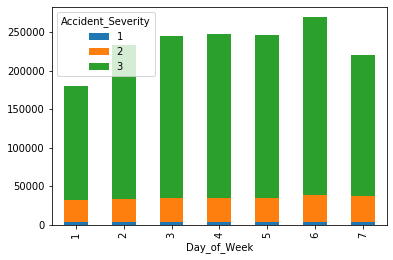

In [85]:
df_acc_dow = pd.pivot_table(df_acc, values='Accident_Index', \
                            index=['Accident_Severity'], \
                            columns=['Day_of_Week'], \
                            aggfunc=np.count_nonzero).transpose()
df_acc_dow.plot(kind='bar', stacked=True)

In [78]:
df_acc['Time'] = pd.to_datetime(df_acc['Time']).dt.hour

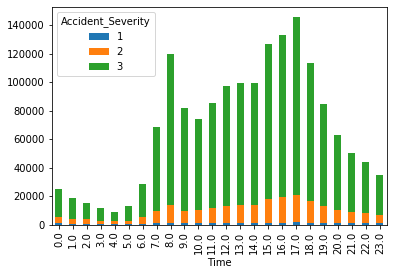

In [107]:
df_acc_time = pd.pivot_table(df_acc, values='Accident_Index', \
                            index=['Accident_Severity'], \
                            columns=['Time'], \
                            aggfunc=np.count_nonzero).transpose()

df_acc_time.plot(kind='bar',stacked=True)

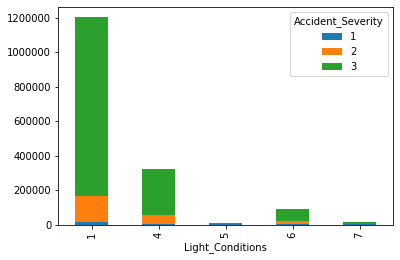

In [112]:
df_acc_light = pd.pivot_table(df_acc, values='Accident_Index', \
                            index=['Accident_Severity'], \
                            columns=['Light_Conditions'], \
                            aggfunc=np.count_nonzero).transpose()
df_acc_light.plot(kind='bar',stacked=True)


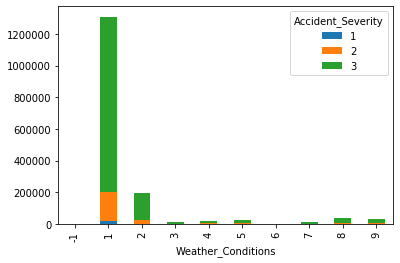

In [113]:
df_acc_weather = pd.pivot_table(df_acc, values='Accident_Index', \
                            index=['Accident_Severity'], \
                            columns=['Weather_Conditions'], \
                            aggfunc=np.count_nonzero).transpose()

df_acc_weather.plot(kind='bar',stacked=True)

### Data preprocessing